<a href="https://colab.research.google.com/github/Ridhi655/Ridhi_assignment/blob/main/Flipkart_Amazon_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the data** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data
df = pd.read_csv("/content/Flipkart_Amazon Mobile Reviews - Flipkart_Amazon Mobile Reviews.csv",index_col=0)

df.head()

,Review-Title,rating,Review-Body,Product Name
0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


# New Section

In [2]:
df.shape

(23777, 4)

In [3]:
df.describe()

,Review-Title,rating,Review-Body,Product Name
count,23775,23777,23160,23777
unique,15040,5,18597,8
top,Good,5.0 out of 5 stars,Good,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto..."
freq,1295,9399,962,4460


In [4]:
df[df["rating"]=='5.0 out of 5 stars'].value_counts()

Review-Title                         rating              Review-Body                                                                                                                                                                                                                                                                                                  Product Name                                              
Good                                 5.0 out of 5 stars  Good                                                                                                                                                                                                                                                                                                         OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)              107
                                                                                                                                                               

In [5]:
df.rating.value_counts()

5.0 out of 5 stars    9399
1.0 out of 5 stars    5231
4.0 out of 5 stars    4886
3.0 out of 5 stars    2703
2.0 out of 5 stars    1558
Name: rating, dtype: int64

In [6]:
#plt

In [7]:
print(df.value_counts(subset=['rating', 'Product Name']))

rating              Product Name                                              
5.0 out of 5 stars  OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)              2071
                    OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)    1678
                    Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)           1571
                    Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM                 1390
1.0 out of 5 stars  Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM                 1060
                    Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)           1022
4.0 out of 5 stars  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)            993
5.0 out of 5 stars  realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)       921
                    Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)             869
4.0 out of 5 stars  OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)               841
1.0 out of 5 stars  OPPO A31 (Mystery Black, 6GB RA

In [8]:
df.isnull().sum()

Review-Title      2
rating            0
Review-Body     617
Product Name      0
dtype: int64

In [9]:
new_df=df.drop_duplicates()

In [10]:
new_df.isnull().sum()

Review-Title      2
rating            0
Review-Body     580
Product Name      0
dtype: int64

In [11]:
new_df.shape

(22615, 4)

In [12]:
new_df['Review-Body'].unique()

array(['Hang problem',
       "I'm writing this review after using 3days !!!Be to honest this is normal Android phoneIt's not like OnePlusCamera quality very low it says 64mp but notSound also lowBattery 🔋 backup ok !!! For one day normal use itsIf ur Gamer don't go for itOverall price it High for this handsetIf u really wanna buy OnePlus ho for higher end modelI'm first time buying OnePlusLittle disappointment",
       "Camera is so good n very fast phone back look is awesomeWith dis price segment it's worth it n d most important thing is the phone has dedicated memory card slot I think dis is the first one plus phone which has d dedicated slot for memory cardBattery backup is also good n wit the help of 65w charger u can charge ur phone frm 50-100% in just 15 minsIt has the super vooc charger frm Dat u can charge ur phone very fastVery smooth touch n very fast phone u can play games with no lagInternet connectivity is also fast n lightning wit my Jio sim as u can c I hav pasted one p

In [13]:
new_df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [14]:
new_df.isnull().sum()

Review-Title    0
rating          0
Review-Body     0
Product Name    0
dtype: int64

In [15]:
new_df.shape

(22034, 4)

**Pre-processing the data**

Some common Problems:

Remove Punctuation

Replace short words

Making text lower case

Remove stopwords

Lemmatization 

**Removing punctuation (.!<>{}’,”(/)-)**

In [16]:
df['Review-Body']

0                                             Hang problem
1        I'm writing this review after using 3days !!!B...
2        Camera is so good n very fast phone back look ...
3        The media could not be loaded.\n              ...
4        I got my delivery on 23 feb when I unboxed the...
                               ...                        
23772    Must he Bhai iss range me bas cemra thoda sa s...
23773                                         Good product
23774                                                 Good
23775    Don't buy this mobile phone money weast screen...
23776    Phone is Good . Camera not upto the mark. UI i...
Name: Review-Body, Length: 23777, dtype: object

In [17]:
# Replacing punctuations with space
new_df['Review-Body'] = new_df['Review-Body'].str.replace("[^a-zA-Z0-9]", " ")
new_df['Review-Title'] = new_df['Review-Title'].str.replace("[^a-zA-Z0-9]", " ")
# Re ordering columns
#new_df = new_df[['Review-Title','rating','Review-Body','Product Name']]
new_df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,Review-Title,rating,Review-Body,Product Name
0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,Ok Not up to the mark,2.0 out of 5 stars,I m writing this review after using 3days B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,One plus losing is originality,3.0 out of 5 stars,The media could not be loaded ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


In [18]:
new_df

,Review-Title,rating,Review-Body,Product Name
0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,Ok Not up to the mark,2.0 out of 5 stars,I m writing this review after using 3days B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,One plus losing is originality,3.0 out of 5 stars,The media could not be loaded ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...
23772,Batten in this rangee,4.0 out of 5 stars,Must he Bhai iss range me bas cemra thoda sa s...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23773,Good mobile,4.0 out of 5 stars,Good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23774,Good camera,5.0 out of 5 stars,Good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23775,Warest mobile,1.0 out of 5 stars,Don t buy this mobile phone money weast screen...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."


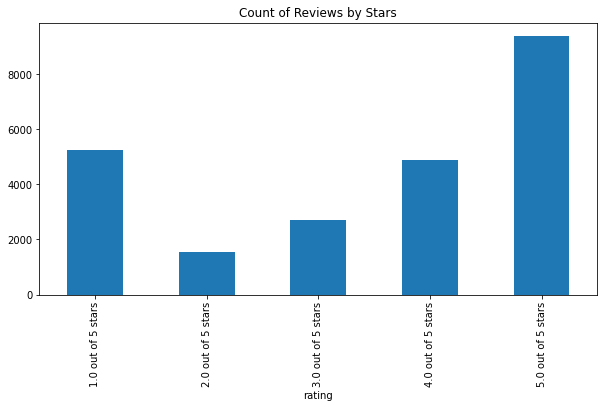

In [19]:
ax = df['rating'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',figsize=(10,5))
ax.set_xlabel('rating')
plt.show()

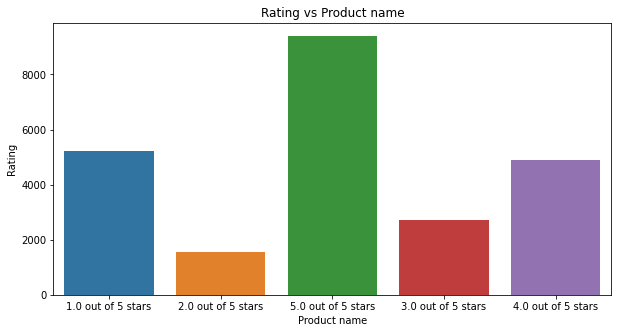

In [20]:
#import numpy as np
import seaborn as sns
fig=plt.figure(figsize = (10,5))
x=new_df.loc[new_df['Product Name']=='OnePlus Nord CE 2 5G(Gray Mirror,8GB RAM,128GB Storage)',:]
sns.countplot(x=df['rating'],data=x)
# creating the bar plot

#plt.bar(x,y)
 
plt.xlabel("Product name")
plt.ylabel("Rating")
plt.title("Rating vs Product name")
plt.show()

In [21]:
new_df.dtypes

Review-Title    object
rating          object
Review-Body     object
Product Name    object
dtype: object

In [22]:
new_df['Review-Body'] = new_df['Review-Body'].apply(lambda row :  ' '.join([word for word in str(row).split() if len(word)>2]))
new_df['Review-Title'] = new_df['Review-Title'].apply(lambda row :  ' '.join([word for word in str(row).split() if len(word)>2]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
new_df['Review-Body']

0                                             Hang problem
1        writing this review after using 3days honest t...
2        Camera good very fast phone back look awesomeW...
3        The media could not loaded average product dec...
4        got delivery feb when unboxed the phone the di...
                               ...                        
23772          Must Bhai iss range bas cemra thoda shi nhi
23773                                         Good product
23774                                                 Good
23775    Don buy this mobile phone money weast screen t...
23776      Phone Good Camera not upto the mark complicated
Name: Review-Body, Length: 22034, dtype: object

**Converting lower case**

In [24]:
new_df['Review-Body']=[review.lower() for review in new_df['Review-Body']]
new_df['Review-Title']=[review.lower() for review in new_df['Review-Title']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
new_df['Review-Body']

0                                             hang problem
1        writing this review after using 3days honest t...
2        camera good very fast phone back look awesomew...
3        the media could not loaded average product dec...
4        got delivery feb when unboxed the phone the di...
                               ...                        
23772          must bhai iss range bas cemra thoda shi nhi
23773                                         good product
23774                                                 good
23775    don buy this mobile phone money weast screen t...
23776      phone good camera not upto the mark complicated
Name: Review-Body, Length: 22034, dtype: object

In [26]:
new_df['Review-Title']

0                   worst phone ever
1                       not the mark
2                       awesome look
3        one plus losing originality
4                               read
                    ...             
23772             batten this rangee
23773                    good mobile
23774                    good camera
23775                  warest mobile
23776         good phone complicated
Name: Review-Title, Length: 22034, dtype: object

**Tokenization**

In [27]:
#Tokenization
import nltk
from nltk import word_tokenize 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')
#stop_words = stopwords.words('hindi')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Lemmatization**

In [29]:
# Begin Lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


new_df['Review-Body'] = new_df['Review-Body'].apply(lambda x: lemmatize_sentence(x))
new_df['Review-Title'] = new_df['Review-Title'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [30]:
new_df['Review-Body']

0                                             hang problem
1        write this review after use 3days honest this ...
2        camera good very fast phone back look awesomew...
3        the medium could not load average product dece...
4        get delivery feb when unbox the phone the disp...
                               ...                        
23772           must bhai iss range ba cemra thoda shi nhi
23773                                         good product
23774                                                 good
23775    don buy this mobile phone money weast screen t...
23776       phone good camera not upto the mark complicate
Name: Review-Body, Length: 22034, dtype: object

In [31]:
new_df['Review-Title']

0                 worst phone ever
1                     not the mark
2                     awesome look
3        one plus lose originality
4                             read
                   ...            
23772           batten this rangee
23773                  good mobile
23774                  good camera
23775                warest mobile
23776        good phone complicate
Name: Review-Title, Length: 22034, dtype: object

**Stopwords Removal**


In [32]:
# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
new_df['Review-Body'] = [remove_stopwords(r) for r in new_df['Review-Body']]
new_df['Review-Title'] = [remove_stopwords(r) for r in new_df['Review-Title']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [33]:
new_df['Review-Body']

0                                             hang problem
1        write review use 3days honest normal android p...
2        camera good fast phone back look awesomewith d...
3        medium could load average product decent day d...
4        get delivery feb unbox phone display damage re...
                               ...                        
23772           must bhai iss range ba cemra thoda shi nhi
23773                                         good product
23774                                                 good
23775    buy mobile phone money weast screen tach probl...
23776               phone good camera upto mark complicate
Name: Review-Body, Length: 22034, dtype: object

In [34]:
new_df['Review-Title']

0                 worst phone ever
1                             mark
2                     awesome look
3        one plus lose originality
4                             read
                   ...            
23772                batten rangee
23773                  good mobile
23774                  good camera
23775                warest mobile
23776        good phone complicate
Name: Review-Title, Length: 22034, dtype: object

In [35]:
from collections import Counter
frequent_words=Counter(" ".join(new_df['Review-Body']).split()).most_common(30)
frequent_words

[('good', 10182),
 ('phone', 9406),
 ('camera', 6781),
 ('quality', 4469),
 ('battery', 3762),
 ('mobile', 3327),
 ('product', 2971),
 ('buy', 2412),
 ('bad', 2408),
 ('use', 2143),
 ('price', 2055),
 ('nice', 2011),
 ('like', 1908),
 ('work', 1712),
 ('best', 1490),
 ('display', 1486),
 ('also', 1485),
 ('get', 1434),
 ('charge', 1413),
 ('one', 1402),
 ('life', 1392),
 ('money', 1300),
 ('day', 1259),
 ('time', 1211),
 ('performance', 1194),
 ('screen', 1089),
 ('poor', 1076),
 ('issue', 1069),
 ('amazon', 1048),
 ('could', 1012)]

**Plotting the Repeated Words**


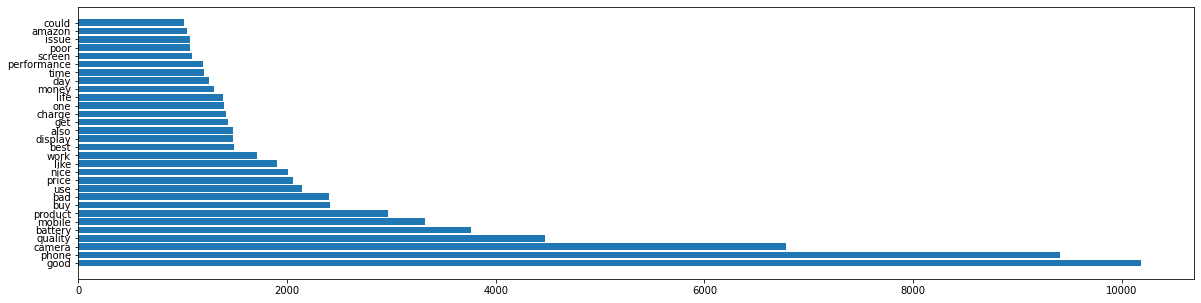

In [36]:
words=[]
count=[]
for i,j in frequent_words:
  words.append(i)
  count.append(j)

plt.figure(figsize=(20,5))
ax = plt.barh(words,count)
plt.show()

**Plotting Wordclound**

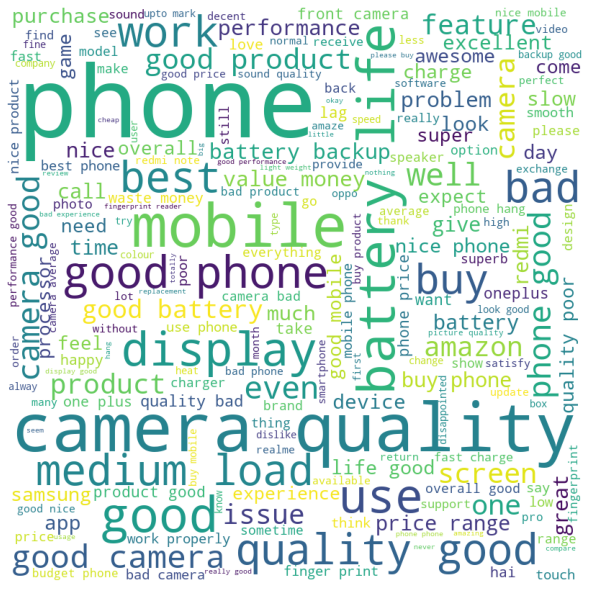

In [37]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 

#new_df = pd.read_csv(r"/content/Flipkart_Amazon Mobile Reviews - Flipkart_Amazon Mobile Reviews.csv", encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in new_df['Review-Body']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

BAG OF WORDS MODEL

In [38]:
from keras.preprocessing.text import Tokenizer
 
text = new_df['Review-Body']
# using tokenizer 
model = Tokenizer()
model.fit_on_texts(text)
 
#print keys 
print(f'Key : {list(model.word_index.keys())}')
 
#create bag of words representation 
rep = model.texts_to_matrix(text, mode='count')
print(rep)

Key : ['good', 'phone', 'camera', 'quality', 'battery', 'mobile', 'product', 'buy', 'bad', 'use', 'price', 'nice', 'like', 'work', 'best', 'display', 'also', 'get', 'charge', 'one', 'life', 'money', 'day', 'time', 'performance', 'screen', 'poor', 'issue', 'amazon', 'could', 'hang', 'look', 'call', 'redmi', 'problem', 'medium', 'range', 'overall', 'load', 'slow', 'fast', 'well', 'feature', 'average', 'low', 'budget', 'much', 'great', 'even', 'back', 'month', 'take', 'purchase', 'samsung', 'value', 'backup', 'awesome', 'hai', 'really', 'game', 'fingerprint', 'give', 'touch', 'sound', 'experience', 'please', 'return', 'service', 'heat', 'excellent', 'expect', 'processor', 'waste', 'worth', 'need', 'front', 'charger', 'video', 'thing', 'want', 'super', 'speaker', 'device', 'everything', 'feel', 'normal', 'ram', 'light', 'apps', 'happy', 'properly', 'many', 'lag', 'come', 'sensor', 'oneplus', 'finger', 'note', 'review', 'worst', 'usage', 'brand', 'plus', 'user', 'love', 'option', 'last', 'm

In [39]:
new_df

,Review-Title,rating,Review-Body,Product Name
0,worst phone ever,1.0 out of 5 stars,hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,mark,2.0 out of 5 stars,write review use 3days honest normal android p...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,awesome look,5.0 out of 5 stars,camera good fast phone back look awesomewith d...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,one plus lose originality,3.0 out of 5 stars,medium could load average product decent day d...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,read,1.0 out of 5 stars,get delivery feb unbox phone display damage re...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...
23772,batten rangee,4.0 out of 5 stars,must bhai iss range ba cemra thoda shi nhi,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23773,good mobile,4.0 out of 5 stars,good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23774,good camera,5.0 out of 5 stars,good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23775,warest mobile,1.0 out of 5 stars,buy mobile phone money weast screen tach probl...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."


**Label encoding for rating feature**

In [40]:
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()

In [41]:
new_df['rating']=LE.fit_transform(new_df['rating'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
new_df['rating']=new_df['rating']+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
new_df

,Review-Title,rating,Review-Body,Product Name
0,worst phone ever,1,hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,mark,2,write review use 3days honest normal android p...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,awesome look,5,camera good fast phone back look awesomewith d...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,one plus lose originality,3,medium could load average product decent day d...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,read,1,get delivery feb unbox phone display damage re...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
...,...,...,...,...
23772,batten rangee,4,must bhai iss range ba cemra thoda shi nhi,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23773,good mobile,4,good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23774,good camera,5,good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."
23775,warest mobile,1,buy mobile phone money weast screen tach probl...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G..."


In [44]:
for x in range(1,len(new_df['rating'])):
  if new_df['rating'][i]==1 or new_df['rating'][i]==2 :
    new_df['rating'][i]=0
  else:
    new_df['rating'][i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
 new_df['rating']

0        1
1        2
2        5
3        3
4        1
        ..
23772    4
23773    4
23774    5
23775    1
23776    4
Name: rating, Length: 22034, dtype: int64

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(new_df['Review-Body'])
X = new_df[['Review-Body']]
y = new_df['rating']

In [48]:
new_df['Review-Body']

0                                             hang problem
1        write review use 3days honest normal android p...
2        camera good fast phone back look awesomewith d...
3        medium could load average product decent day d...
4        get delivery feb unbox phone display damage re...
                               ...                        
23772           must bhai iss range ba cemra thoda shi nhi
23773                                         good product
23774                                                 good
23775    buy mobile phone money weast screen tach probl...
23776               phone good camera upto mark complicate
Name: Review-Body, Length: 22034, dtype: object

In [49]:
new_df["is_bad_review"] = new_df["rating"].apply(lambda x: 0 if x < 5 else 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
new_df["is_bad_review"]

0        0
1        0
2        1
3        0
4        0
        ..
23772    0
23773    0
23774    1
23775    0
23776    0
Name: is_bad_review, Length: 22034, dtype: int64

In [51]:
new_df

,Review-Title,rating,Review-Body,Product Name,is_bad_review
0,worst phone ever,1,hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0
1,mark,2,write review use 3days honest normal android p...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0
2,awesome look,5,camera good fast phone back look awesomewith d...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1
3,one plus lose originality,3,medium could load average product decent day d...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0
4,read,1,get delivery feb unbox phone display damage re...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0
...,...,...,...,...,...
23772,batten rangee,4,must bhai iss range ba cemra thoda shi nhi,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",0
23773,good mobile,4,good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",0
23774,good camera,5,good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",1
23775,warest mobile,1,buy mobile phone money weast screen tach probl...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",0


In [52]:
# Importing module
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 5 tokens
tfidf = TfidfVectorizer(max_features=10)
X = tfidf.fit_transform(new_df['Review-Body']).toarray()
y = new_df['rating'].values
featureNames = tfidf.get_feature_names()

X, y


# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [53]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.19116416, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [54]:
y_train

array([5, 5, 5, ..., 5, 5, 2])

In [55]:
X_train.shape, X_test.shape

((17627, 10), (4407, 10))

In [56]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.19116416, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [57]:
#new_data = X_train[~np.isnan(X_train)]
#new_data

In [58]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package  
#magic happens - best values of betas - training/learning happens here
logistic_regression.fit(X_train,y_train) 
y_pred=logistic_regression.predict(X_test)


y_pred

array([1, 5, 5, ..., 1, 1, 5])

In [59]:
logistic_regression.coef_

array([[ 1.87523518, -0.43389097,  1.08279829, -0.08231416, -1.62892139,
         0.55943593,  0.40958598,  0.45322663,  0.13321214, -0.06657892],
       [ 1.04298823,  0.08400429,  0.63027806,  0.28831848, -0.48510886,
        -0.19729241,  0.02579668, -0.28918104,  0.46429488,  0.55349743],
       [ 0.60921152,  0.09790959, -0.30958452,  0.5147621 ,  0.42999564,
        -0.20448741, -0.1503324 , -0.4102719 ,  0.26703349, -0.00956438],
       [-0.95367767,  0.26562809, -0.71063598,  0.07826896,  0.99650677,
        -0.1274581 , -0.13827704,  0.0190213 , -0.30550103,  0.02788853],
       [-2.57375726, -0.013651  , -0.69285584, -0.79903539,  0.68752784,
        -0.030198  , -0.14677321,  0.22720501, -0.55903949, -0.50524266]])

In [60]:
logistic_regression.intercept_

array([ 0.20818326, -0.95377034, -0.4311966 ,  0.14648164,  1.03030204])

In [61]:
#from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
#logistic_regression.score(X_test,y_test) # accuracy
#confusion_matrix(y_test,y_pred)
#f1_score(y_test,y_pred)
#logistic_regression.score(X_test,y_test)
#plot_roc_curve(logistic_regression, X_test, y_test)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [63]:

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

In [65]:

y_pred

array([1, 5, 5, ..., 1, 1, 5])

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[ 412   23   31   35  543]
 [ 108   10   12   25  163]
 [ 119    9   29   62  315]
 [ 100   19   28   87  651]
 [ 156   16   43   86 1325]]
The model accuracy is 0.4227365554799183


In [67]:
cm.shape

(5, 5)

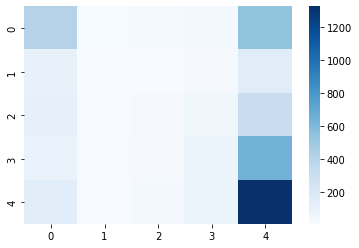

In [68]:
group_names = ["True Pos","False Pos","False Neg","True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, fmt="", cmap='Blues')

In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test, sample_weight=None)

0.4329475833900613

In [70]:
from sklearn.metrics import accuracy_score
print('accuracy score:',clf.score(X_test,y_test))

accuracy score: 0.4329475833900613


In [71]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()
mn.fit(X_train,y_train)
mn.predict(X_test)
mn.score(X_test,y_test)

0.4315861130020422

In [72]:
from sklearn.metrics import accuracy_score
print('Accuracy Score:',mn.score(X_test,y_test))

Accuracy Score: 0.4315861130020422


In [73]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
new_df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in new_df['Review-Body']]
new_df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in new_df['Review-Body']]
new_df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in new_df['Review-Body']]

data = new_df[['Review-Body', 'Positive', 'Neutral', 'Negative']]
data

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,Review-Body,Positive,Neutral,Negative
0,hang problem,0.000,0.270,0.730
1,write review use 3days honest normal android p...,0.120,0.768,0.112
2,camera good fast phone back look awesomewith d...,0.256,0.744,0.000
3,medium could load average product decent day d...,0.278,0.672,0.049
4,get delivery feb unbox phone display damage re...,0.219,0.687,0.094
...,...,...,...,...
23772,must bhai iss range ba cemra thoda shi nhi,0.000,1.000,0.000
23773,good product,0.744,0.256,0.000
23774,good,1.000,0.000,0.000
23775,buy mobile phone money weast screen tach probl...,0.197,0.687,0.116


In [74]:
new_df

,Review-Title,rating,Review-Body,Product Name,is_bad_review,Positive,Neutral,Negative
0,worst phone ever,1,hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,0.000,0.270,0.730
1,mark,2,write review use 3days honest normal android p...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,0.120,0.768,0.112
2,awesome look,5,camera good fast phone back look awesomewith d...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1,0.256,0.744,0.000
3,one plus lose originality,3,medium could load average product decent day d...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,0.278,0.672,0.049
4,read,1,get delivery feb unbox phone display damage re...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",0,0.219,0.687,0.094
...,...,...,...,...,...,...,...,...
23772,batten rangee,4,must bhai iss range ba cemra thoda shi nhi,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",0,0.000,1.000,0.000
23773,good mobile,4,good product,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",0,0.744,0.256,0.000
23774,good camera,5,good,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",1,1.000,0.000,0.000
23775,warest mobile,1,buy mobile phone money weast screen tach probl...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",0,0.197,0.687,0.116


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating matrix of top 10 tokens
tfidf = TfidfVectorizer(max_features=10)
X = tfidf.fit_transform(new_df['Review-Body']).toarray()
y = new_df['is_bad_review'].values
featureNames = tfidf.get_feature_names()

X, y


# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [77]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
lr= LogisticRegression() #initialise the required package  
#magic happens - best values of betas - training/learning happens here
lr.fit(X_train,y_train) 
y_pred=lr.predict(X_test)


y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [78]:
from sklearn.metrics import accuracy_score
print('accuracy score:',lr.score(X_test,y_test))

accuracy score: 0.6347794518061354


In [79]:
logistic_regression.coef_

array([[ 1.87523518, -0.43389097,  1.08279829, -0.08231416, -1.62892139,
         0.55943593,  0.40958598,  0.45322663,  0.13321214, -0.06657892],
       [ 1.04298823,  0.08400429,  0.63027806,  0.28831848, -0.48510886,
        -0.19729241,  0.02579668, -0.28918104,  0.46429488,  0.55349743],
       [ 0.60921152,  0.09790959, -0.30958452,  0.5147621 ,  0.42999564,
        -0.20448741, -0.1503324 , -0.4102719 ,  0.26703349, -0.00956438],
       [-0.95367767,  0.26562809, -0.71063598,  0.07826896,  0.99650677,
        -0.1274581 , -0.13827704,  0.0190213 , -0.30550103,  0.02788853],
       [-2.57375726, -0.013651  , -0.69285584, -0.79903539,  0.68752784,
        -0.030198  , -0.14677321,  0.22720501, -0.55903949, -0.50524266]])

In [80]:
logistic_regression.intercept_

array([ 0.20818326, -0.95377034, -0.4311966 ,  0.14648164,  1.03030204])

In [81]:

from sklearn.neighbors import KNeighborsClassifier


# knn
mod2 = KNeighborsClassifier(n_neighbors=4)

# fit model

mod2.fit(X_train, y_train)

# predict probabilities

pred_prob2 = mod2.predict_proba(X_test)

In [82]:
from sklearn.metrics import accuracy_score
print('accuracy score:',mod2.score(X_test,y_test))

accuracy score: 0.613178435287711


In [83]:
from sklearn.ensemble import RandomForestClassifier
clfr = RandomForestClassifier(max_depth=2, random_state=0)
clfr.fit(X_train, y_train)
clfr.predict(X_test)
clfr.score(X_test, y_test, sample_weight=None)

0.6189871119985478

In [84]:
from sklearn.tree import DecisionTreeClassifier

dts = DecisionTreeClassifier()
dts.fit(X_train,y_train)

y_pred = dts.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score
print('accuracy score:',clfr.score(X_test,y_test))

accuracy score: 0.6189871119985478


In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cms = confusion_matrix(y_test, y_pred)
print(cms)
print("The model accuracy is", accuracy )

[[2928  482]
 [1571  528]]
The model accuracy is 0.6273370847703758


In [87]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
mnb.predict(X_test)
mnb.score(X_test,y_test)

0.6322381557451443

In [88]:
from sklearn.metrics import accuracy_score
print('Accuracy Score:',mnb.score(X_test,y_test))

Accuracy Score: 0.6322381557451443


In [89]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [90]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [91]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6376837901615539

In [92]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[3049  361]
 [1635  464]]


**

In [93]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative ")
    else:
        print("Neutral")
sentiment_score(x, y, z)

Neutral


In [94]:
print("Positive: ", round(x,2))
print("Negative: ", round(y,2))
print("Neutral: ", round(z,2))

Positive:  8082.15
Negative:  2144.85
Neutral:  11392.01


In [ ]:
#pd.read_excel('',header=0, delim_whitespace=True)
review=input("Enter the Review:")
test_input=(new_df[['Review-Body']])
result=model.predict(test_input)
print("Review REsults")
print('is is a:',result)